In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_table('iris data.data',sep=',')
df

,sepal length,sepal width,petal length,petal width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
variety         0
dtype: int64

In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,sepal length,sepal width,petal length,petal width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data=df.copy(deep=True)

In [8]:
numcols=data.select_dtypes("float64").columns
objcols=data.select_dtypes("object").columns

In [9]:
data[data.duplicated()].index.tolist()

[34, 37, 142]

In [10]:
def duplicate_item():
    duplicate_rows = data[data.duplicated()].index.tolist()
    data.drop(duplicate_rows,axis=0, inplace=True)
    data.reset_index(drop=True)

In [11]:
duplicate_item()

In [12]:
data[data.duplicated()].index.tolist()

[]

In [13]:
data

,sepal length,sepal width,petal length,petal width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='variety', ylabel='count'>

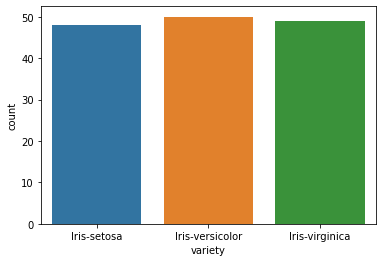

In [14]:
sns.countplot(data=data, x='variety')

<AxesSubplot:xlabel='petal length'>

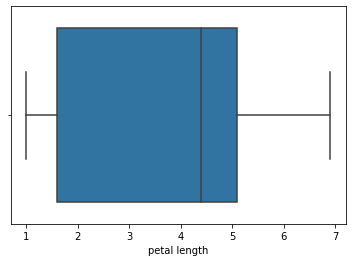

In [15]:
sns.boxplot(data=data, x='petal length')

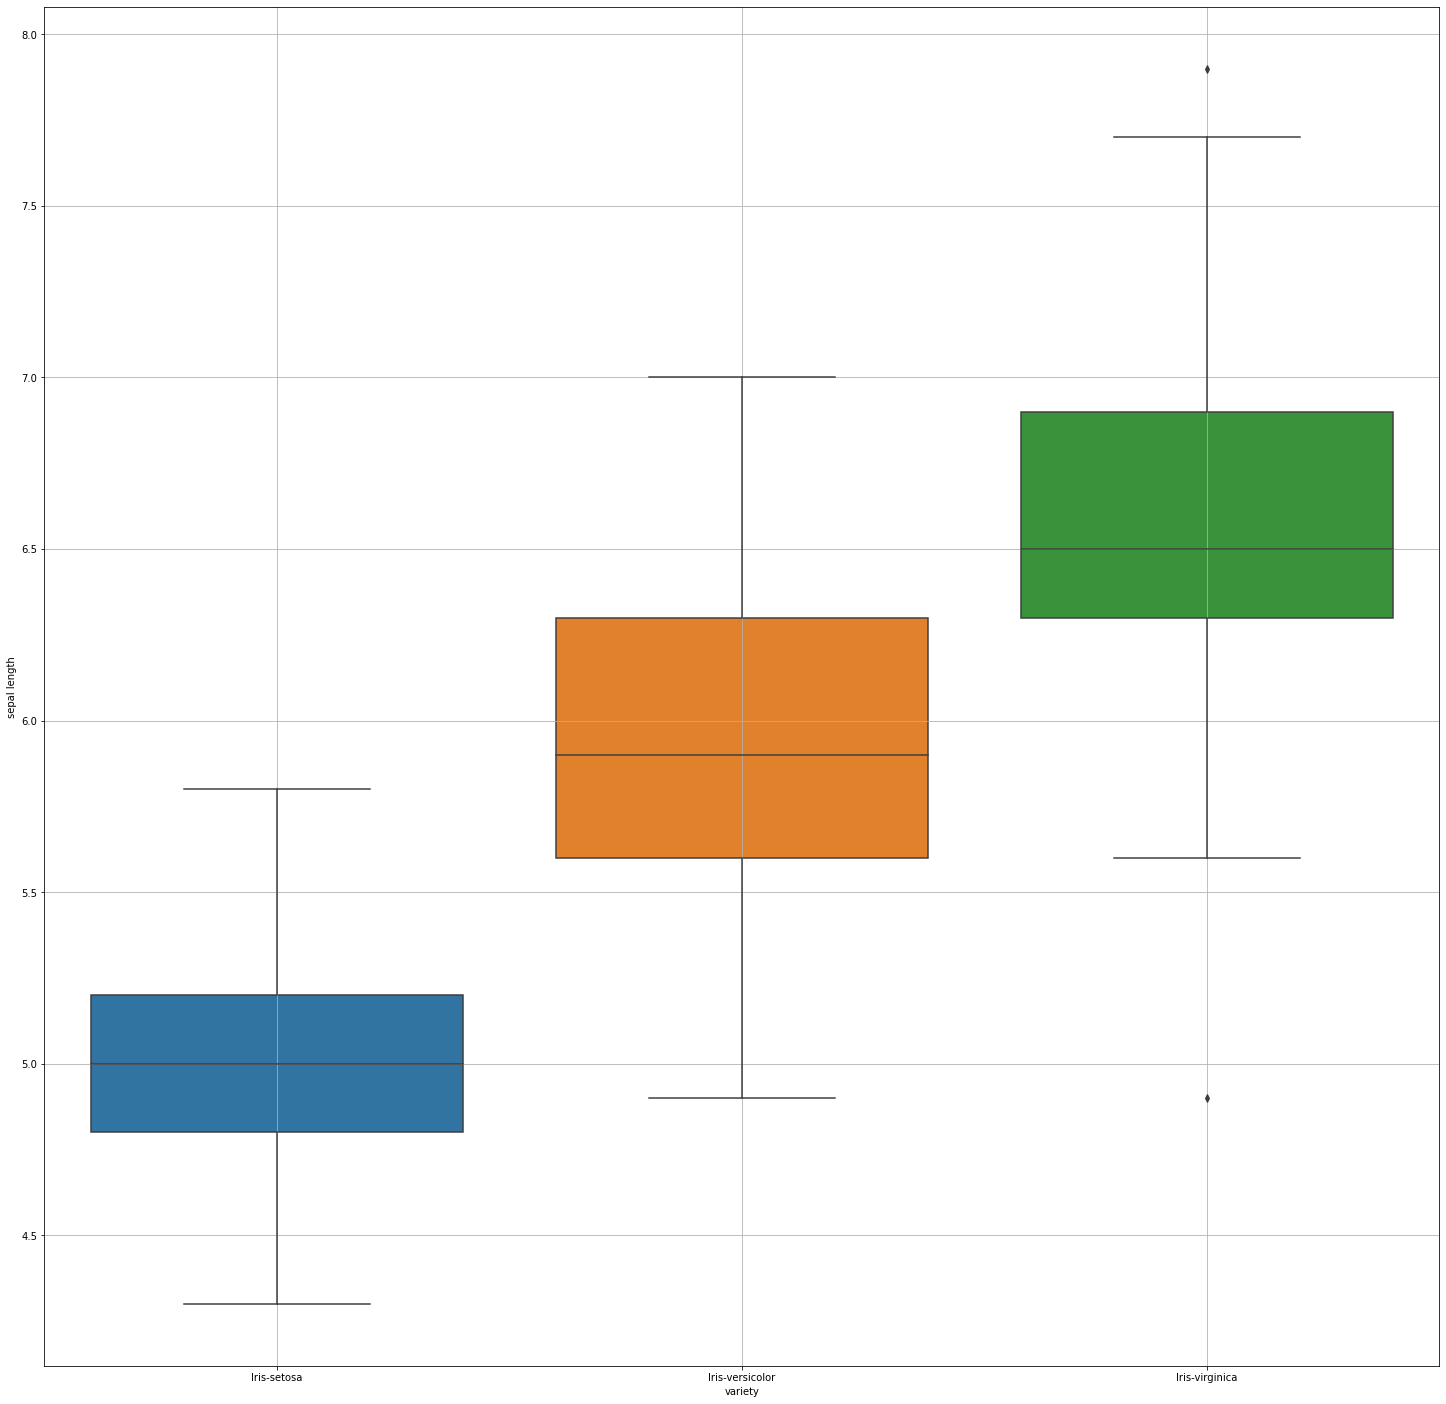

In [16]:
plt.figure(figsize=(25,25))
sns.boxplot(data=data,x='variety',y='sepal length');
plt.grid()

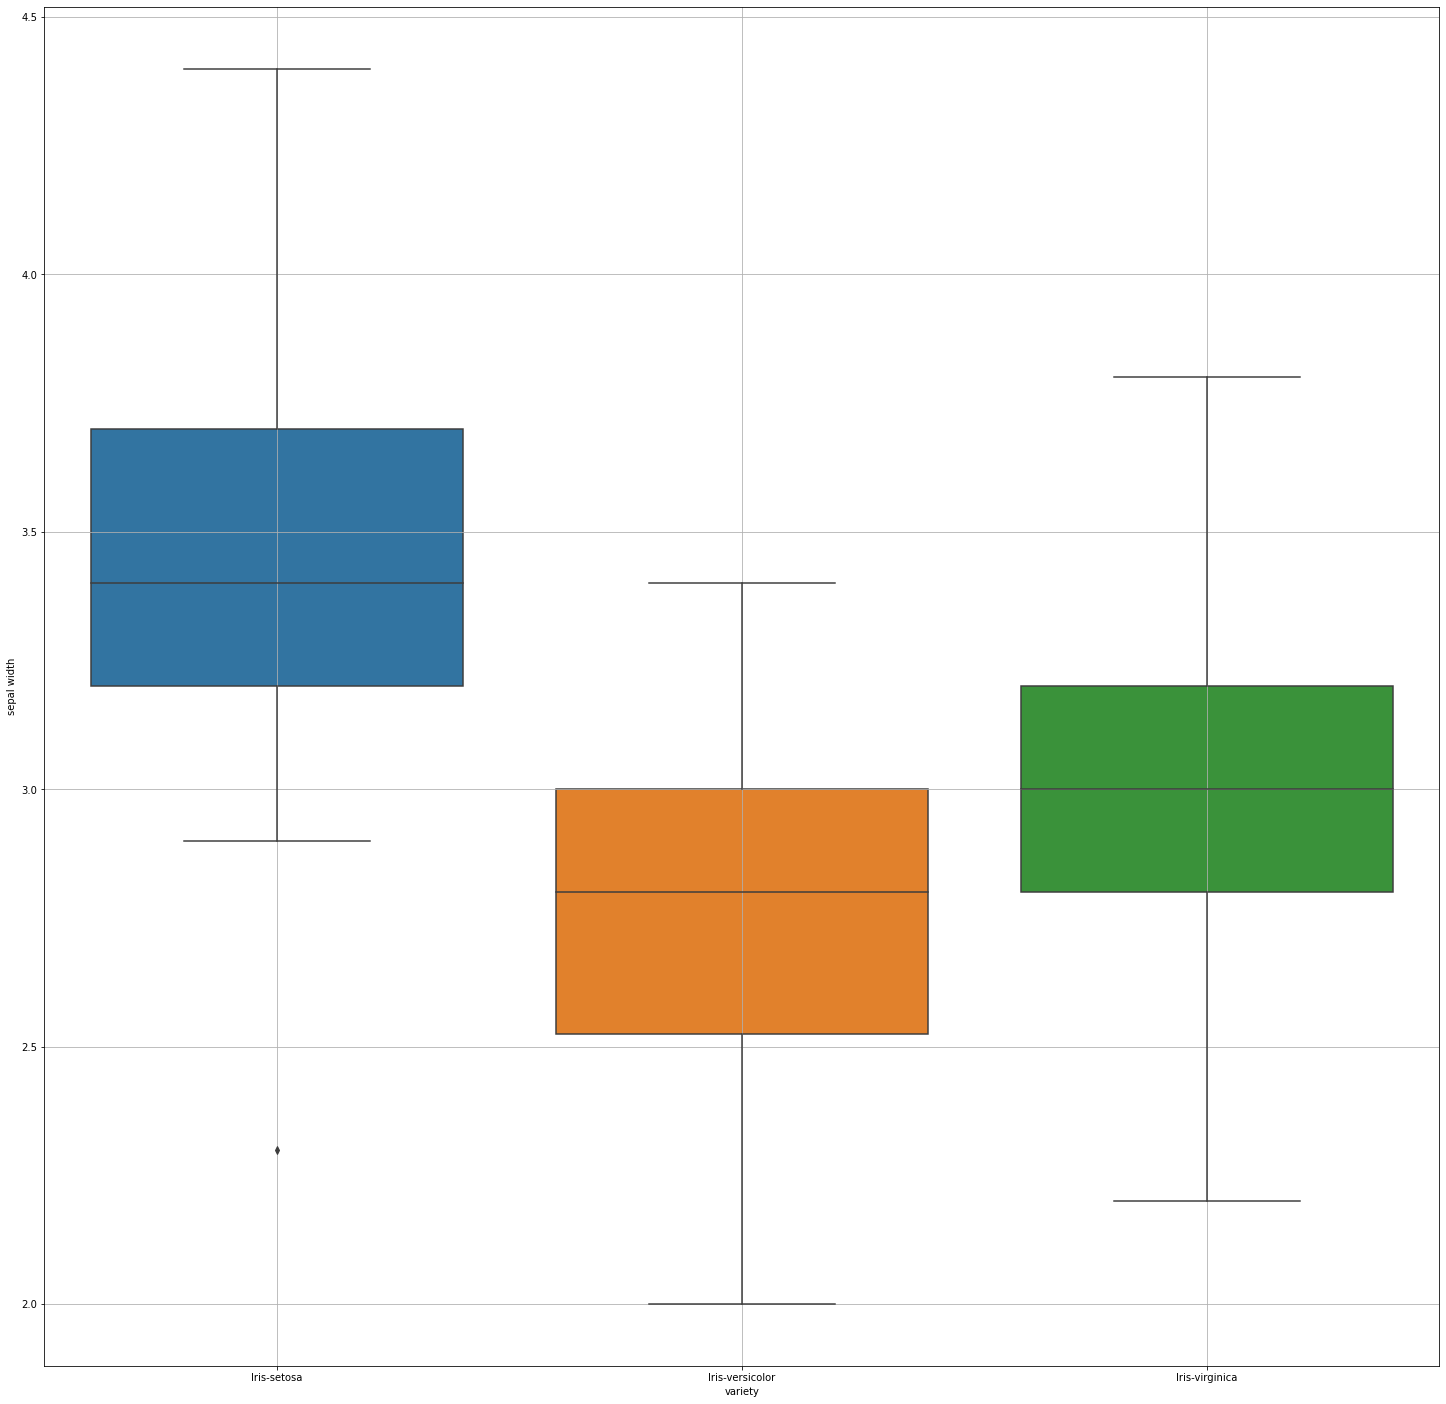

In [17]:
plt.figure(figsize=(25,25))
sns.boxplot(data=data,x='variety',y='sepal width');
plt.grid()

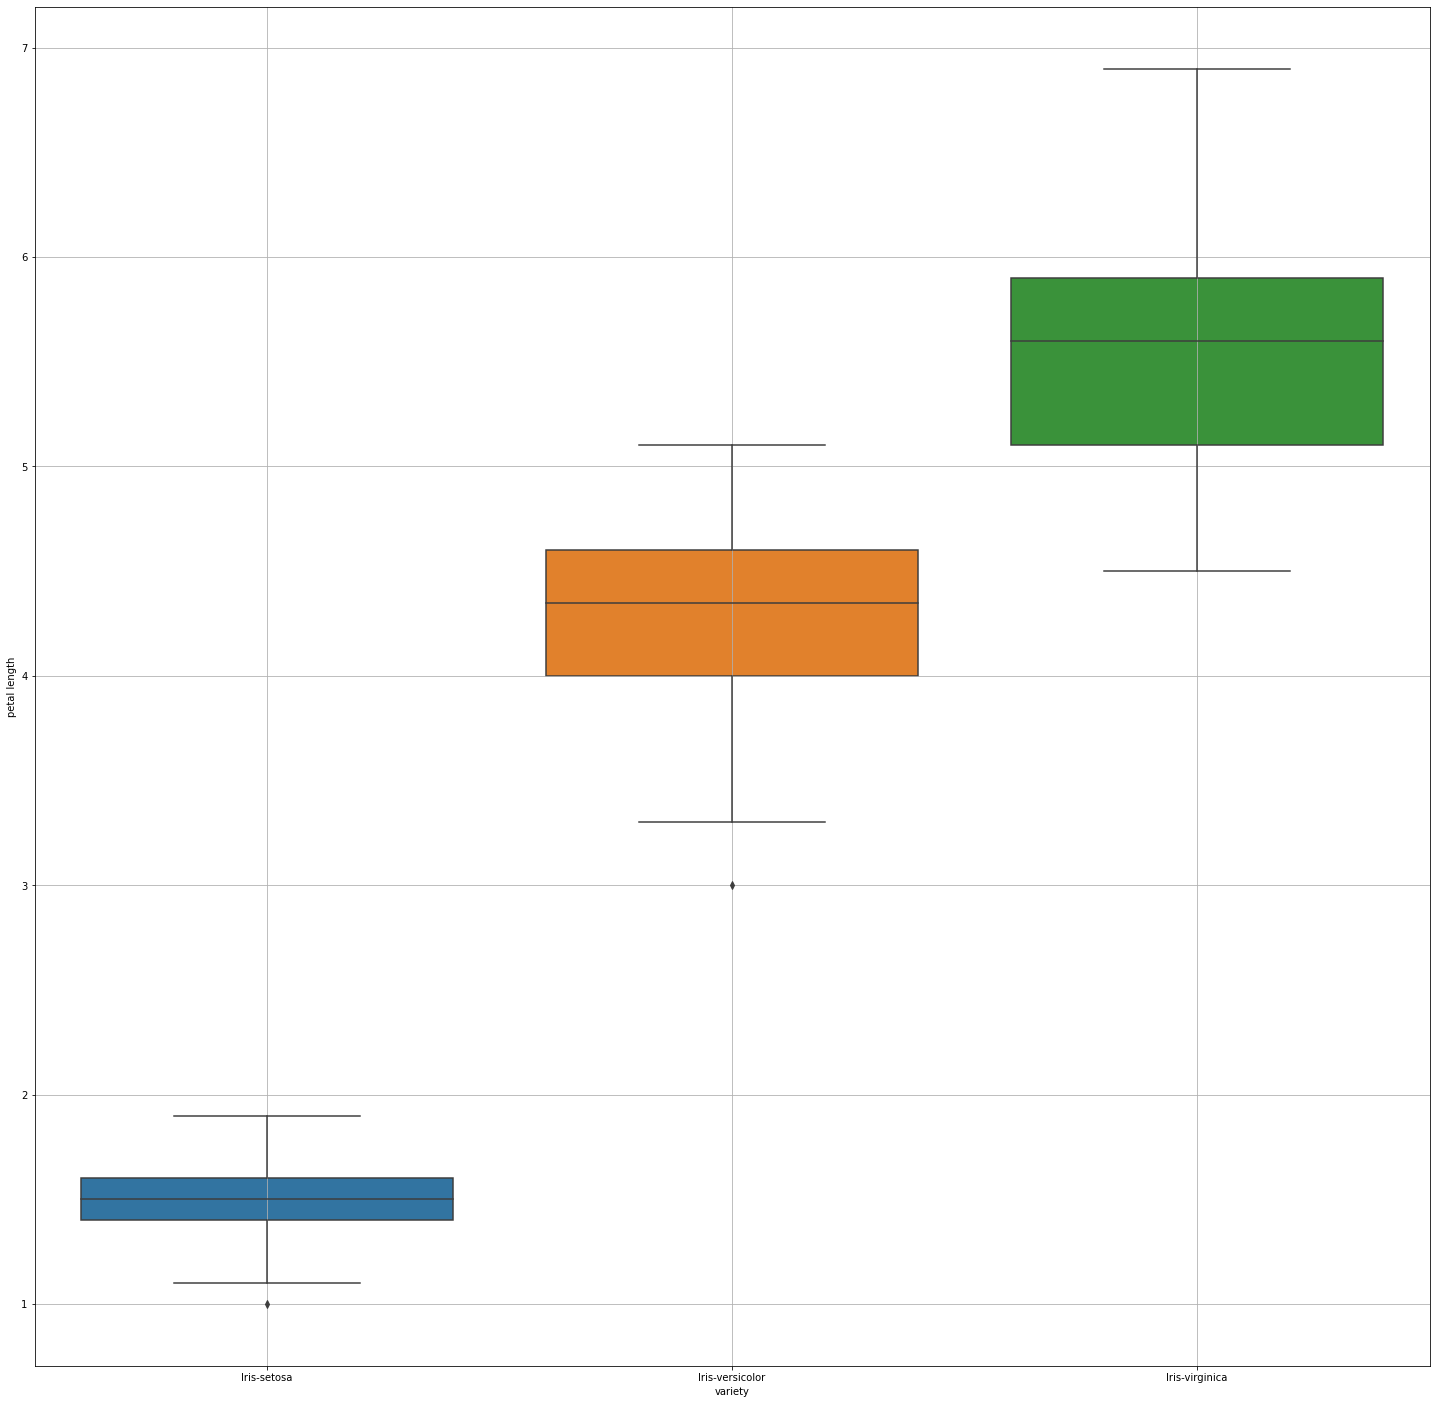

In [18]:
plt.figure(figsize=(25,25))
sns.boxplot(data=data,x='variety',y='petal length');
plt.grid()

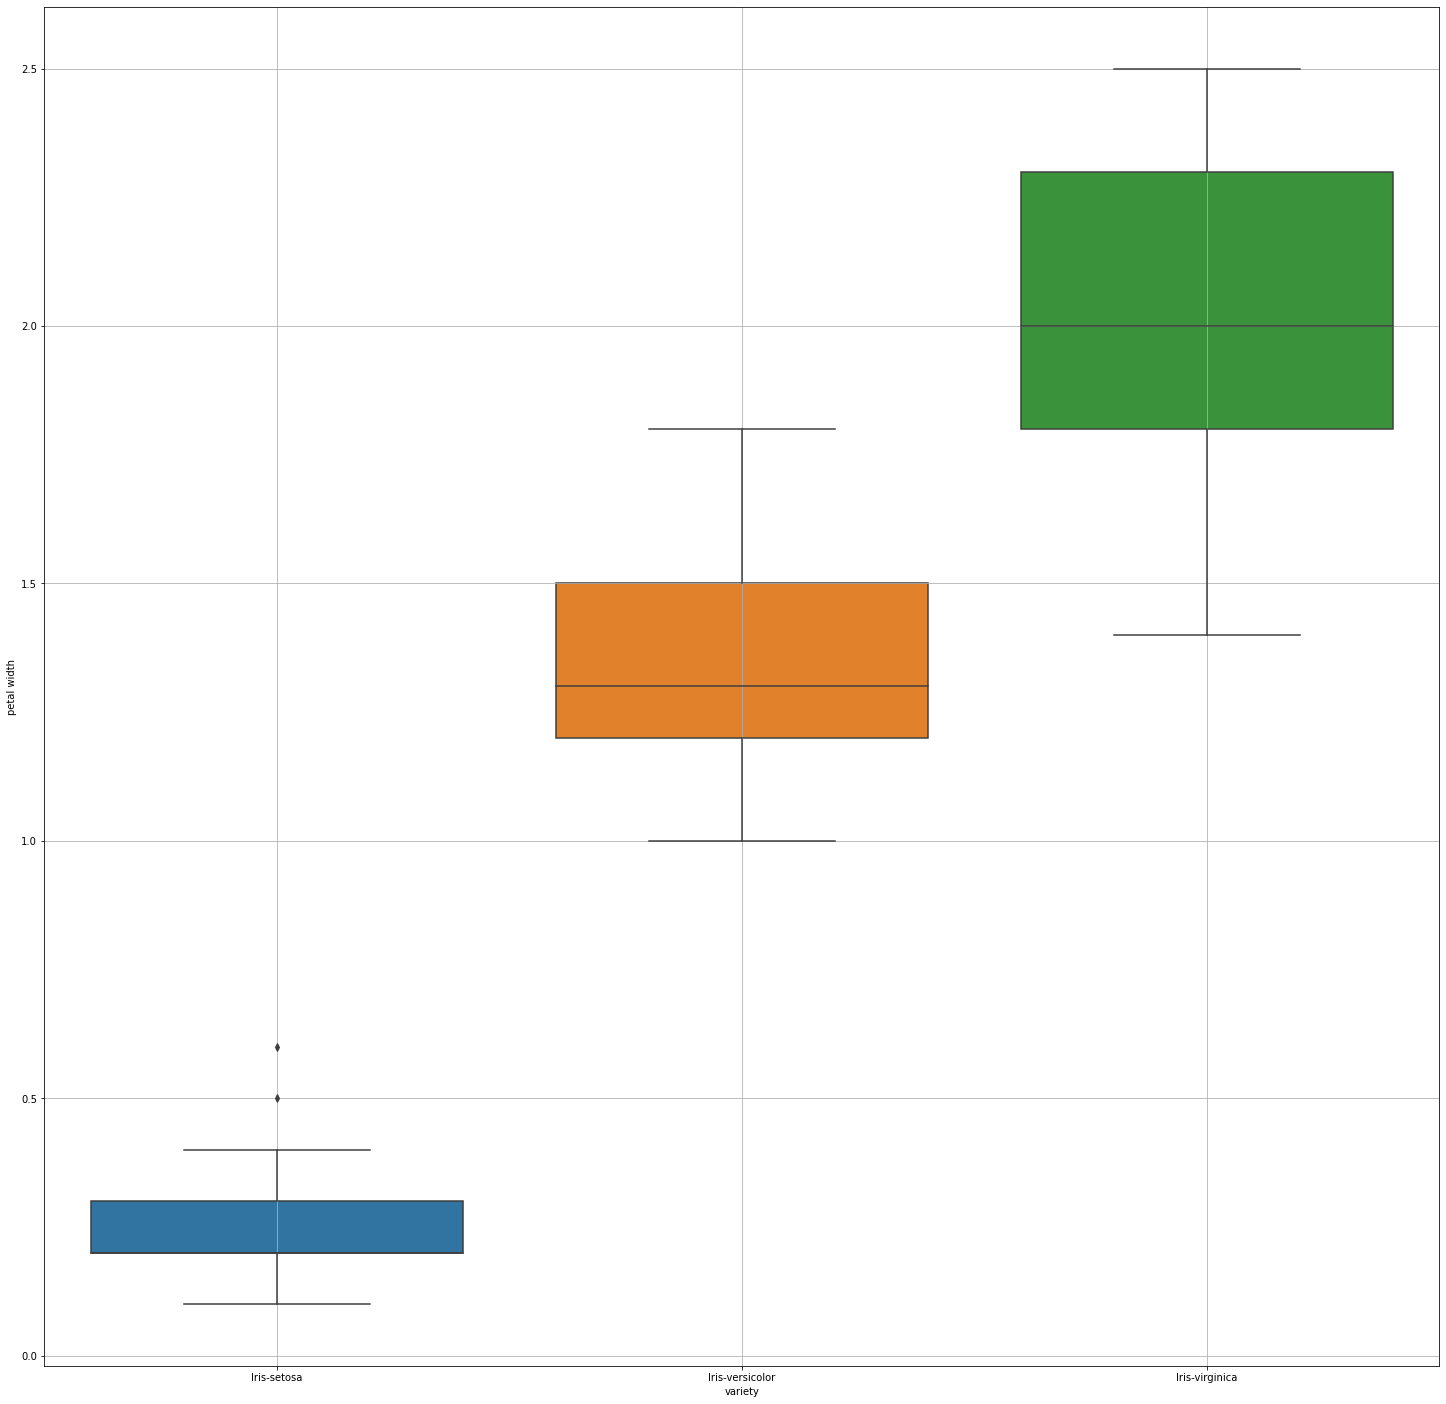

In [19]:
plt.figure(figsize=(25,25))
sns.boxplot(data=data,x='variety',y='petal width');
plt.grid()

In [20]:
def iqr_outliers(data):
    data = sorted(data)
    n = len(data)
    q1 = data[int(n * 0.25)]
    q3 = data[int(n * 0.75)]
    iqr = q3-q1
    lower_wisker = q1-1.5*iqr
    upper_wisker = q3+1.5*iqr
    
    outliers = []
    for index,value in enumerate(data):
        if value > upper_wisker or value < lower_wisker:
            outliers.append(index)
    return outliers

In [21]:
iqr_outliers(data["sepal width"])

[0, 144, 145, 146]

In [22]:
iqr_outliers(data["sepal length"])

[]

In [23]:
iqr_outliers(data["petal width"])

[]

In [24]:
iqr_outliers(data["petal length"])

[]

In [25]:
data.head()

,sepal length,sepal width,petal length,petal width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['variety'] = le.fit_transform(data.variety.values)

In [27]:
data.head()

,sepal length,sepal width,petal length,petal width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
feature=data.iloc[:,:-1]

In [29]:
feature

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
target=data.iloc[:,-1]

In [31]:
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 147, dtype: int32

In [89]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size=0.3, random_state=2)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

In [91]:
trainacc = knn.score(xtrain,ytrain)
testacc = knn.score(xtest,ytest)

In [92]:
trainacc

0.9803921568627451

In [93]:
testacc

0.9777777777777777

In [94]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)

In [95]:
trainacc = lr.score(xtrain,ytrain)

In [96]:
testacc = lr.score(xtest,ytest)

In [98]:
trainacc

0.9803921568627451

In [97]:
testacc

0.9777777777777777